Running time of batch: 0.008253200001490768
Running time of stochastic: 0.5674048000000766
Running time of min batch: 0.1318775999970967


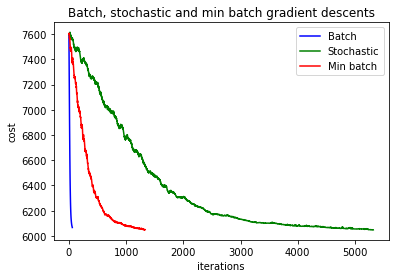

In [37]:
#Implementing SVM with three different gradient desecent algorithms
import numpy as np
import matplotlib.pyplot as plt
import timeit

#Loading data
data = np.loadtxt('data1.txt')
X = np.array(data[:, 0:8])
y = np.array(data[:, 8], ndmin=2)

# The number of features and w parameters.
n = X.shape[1]

#number of examples
m = X.shape[0]

C = 10


# loss function
def loss(X, y, b, para, c):
    m = X.shape[0]
    cost = 0.5*np.dot(para.T,para) + c * np.sum( np.maximum( np.zeros(m), 1-y*(X@para+b) ))
    return cost.item()

#batch gradient descent
lr_b = 0.000000001
ep_b = 0.03
def bGradientDescent(X, y, lr, ep, C):
    m = X.shape[0]
    n = X.shape[1]
    para = np.zeros(n)
    b = 0
    new_b = 0
    new_para = np.zeros(n)
    costHistory = []
    costHistory.append(loss(X, y, b, para, C))
    k = 0
    while True:
        flag = y*(X@para+b) < 1
        flag = flag.astype(int)
        w_parGrad = np.zeros(n)
        b_parGrad = 0
        
        #updataing w parameters
        for j in range(0, n):
            w_parGrad[j] = np.sum(flag*(-y*X[:,j]))
        w_grad = para + C * w_parGrad
        
        new_para = para-lr*w_grad
        para = new_para
        #updating b parameter
        b_parGrad = np.sum( flag * (-y) )
        b_grad = C*b_parGrad
        new_b = b-lr*b_grad
        b = new_b
        costHistory.append(loss(X, y, b, para, C))
        #print("Iter %d" % k, costHistory[-1])
        k = k+1
        # convergence critrion
        if abs(costHistory[k-1]-costHistory[k])*100/costHistory[k-1] < ep:
            break
    return costHistory, para
#Capturing convergence time for batch           
b_start = timeit.default_timer() #record start time for batch gradient descent
cost_b, para_b = bGradientDescent(X, y, lr_b, ep_b, C)
b_end = timeit.default_timer() #record end time for batch gradient descent

#stochastic gradient descent
lr_s = 0.00000001
ep_s = 0.4
def sGradientDescent(X, y, lr, ep, C):
    m = X.shape[0]
    n = X.shape[1]
    para = np.zeros(n)
    b = 0
    new_b = 0
    new_para = np.zeros(n)
    costHistory = []
    convCritCost = []
    costHistory.append(loss(X, y, b, para, C))
    size = 4
    k = 0
    t = 0
    while True:
        for i in range (m):
            #X1 = np.array(data[i, 0:8])
            flag = y[0][i]*(X[i, :]@para+b) < 1
            flag = flag.astype(int)
            w_parGrad = np.zeros(n)
            b_parGrad = 0

            #updataing w parameters
            for j in range(0, n):
                w_parGrad[j] = np.sum( flag * (-y[0][i]*X[i][j]))
            w_grad = para + C * w_parGrad

            new_para = para-lr*w_grad
            para = new_para
            #updating b parameter
            b_parGrad = np.sum( flag * (-y[0][i]) )
            b_grad = C*b_parGrad
            new_b = b-lr*b_grad
            b = new_b
            #loss function computation was turned off when computing convergence time for second time
            costHistory.append(loss(X , y, b, para, C))
            #print("Iter %d" % k, costHistory[-1])
            k = k+1
        # convergence critrion
        convCritCost.append(loss(X , y, b, para, C))
        if len(convCritCost)>2:
            t = t+1
            if abs(convCritCost[t-1]-convCritCost[t])*100/convCritCost[t-1] < ep:
                break
        
    return costHistory, para
#Capturing convergence time for stochastic        
s_start = timeit.default_timer() #record start time for batch gradient descent
cost_s, para_s = sGradientDescent(X, y, lr_s, ep_s, C)
s_end = timeit.default_timer() #record end time for batch gradient descent

#min batch gradient descent
lr_m = 0.00000001
ep_m = 0.5
def mGradientDescent(X, y, lr, ep, c):
    m = X.shape[0]
    n = X.shape[1]
    para = np.zeros(n)
    b = 0
    new_b = 0
    new_para = np.zeros(n)
    costHistory = []
    convCritCost = []
    costHistory.append(loss(X, y, b, para, c))
    size = 4
    k = 0
    t = 0
    while True:
        for i in range(0,m,size):
            s = i+size
            X1 = np.array(data[i:s, 0:8])
            flag = y[0, i:s]*(X[i:s, :]@para+b) < 1
            flag = flag.astype(int)
            w_parGrad = np.zeros(n)
            b_parGrad = 0
            #updataing w parameters
            for j in range(0, n):
                w_parGrad[j] = np.sum( flag * (-y[:, i:s]*X[i:s,j]) )
            w_grad = para + C * w_parGrad
            new_para = para-lr*w_grad
            para = new_para
            #updating b parameter
            b_parGrad = np.sum( flag * (-y[:, i:s]))
            b_grad = C*b_parGrad
            new_b = b-lr*b_grad
            b = new_b
            #loss function computation was turned off when computing running time for second time
            costHistory.append(loss(X, y, b, para, C))
            #print("Iter %d" % k, costHistory[-1])
            k = k+1
        # convergence critrion
        convCritCost.append(loss(X, y, b, para, C))
        if len(convCritCost)>2:
            t = t+1
            if abs(convCritCost[t-1]-convCritCost[t])*100/convCritCost[t-1] < ep:
                break
    return costHistory, para
#Capturing convergence time for min batch   
m_start = timeit.default_timer() #record start time for batch gradient descent
cost_m, para_m = mGradientDescent(X, y, lr_m, ep_m, C)
m_end = timeit.default_timer() #record end time for batch gradient descent

#printing running times
print("Running time of batch:", b_end-b_start)
print("Running time of stochastic:", s_end-s_start)
print("Running time of min batch:", m_end-m_start)

#plotting batch graph
plt.plot(cost_b, color='b', label='batch')
#plotting stochastic graph
plt.plot(cost_s, color='g', label='stochastic')
#plotting min batch graph
plt.plot(cost_m, color='r', label='min batch')
plt.legend(["Batch", "Stochastic", "Min batch"])
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Batch, stochastic and min batch gradient descents")

plt.show()
